In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\ICC Mens T20 Worldcup.csv")

In [100]:
df.head()

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
0,1st,"Saturday,June 1,2024","Grand Prairie Stadium, Dallas",Canada,United State Of America,Group A,United State Of America,Fielding,194,5,...,United State Of America,Normal Match,Wickets,7,Aaron Jones,94,Dilon Heyliger,1,19,Aaron Jones
1,2nd,"Sunday,June 2,2024","Providence Stadium, Guyana",Papua New Guinea,Afghanistan,Group C,Afghanistan,Fielding,95,10,...,Afghanistan,Normal Match,Wickets,7,Gulbadin Naib,49,Fazalhaq Farooqi,3,16,Fazalhaq Farooqi
2,3rd,"Sunday,June 2,2024","Kensington Oval, Bridgetown, Barbados",Oman,Namibia,Group B,Namibia,Fielding,109,10,...,Namibia,Normal Match,Wickets,4,Jan Frylinck,45,Mehran Khan,3,7,David Wiese
3,4th,"Monday,June 3,2024","Nassau County International Cricket Stadium, N...",Sri Lanka,South Africa,Group D,Sri Lanka,Batting,77,10,...,South Africa,Normal Match,Wickets,6,Quinton de Kock,20,Anrich Nortje,4,7,Anrich Nortje
4,5th,"Monday,June 3,2024","Providence Stadium, Guyana",Afghanistan,Uganda,Group C,Uganda,Fielding,183,5,...,Afghanistan,Normal Match,Runs,125,Rahmanullah Gurbaz,76,Fazalhaq Farooqi,5,9,Fazalhaq Farooqi


In [101]:
print(f"Your rows are {df.shape[0]} and your columns are {df.shape[1]}")

Your rows are 55 and your columns are 22


## Most match win by a team

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6504\206385187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = match_wins.values,y=match_wins.index,palette='viridis')


Text(0.5, 1.0, 'Most wins by a team')

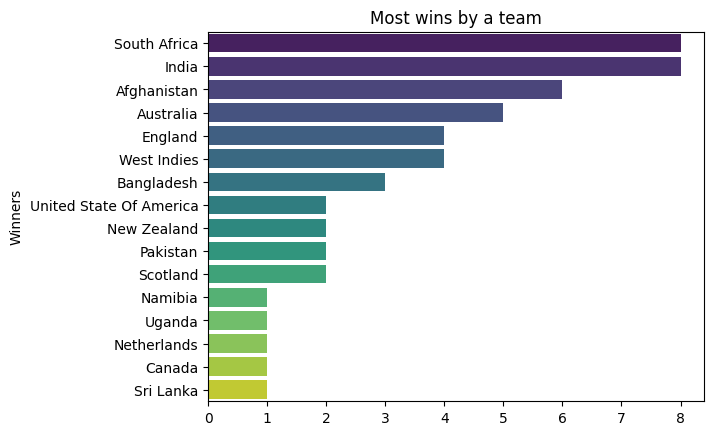

In [110]:
match_wins = df['Winners'].value_counts()
sns.barplot(x = match_wins.values,y=match_wins.index,palette='viridis')
plt.title("Most wins by a team")

## 2. Toss Decision Trends

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6504\2980431463.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Toss Decision'],palette='Set1')


<Axes: xlabel='Toss Decision', ylabel='count'>

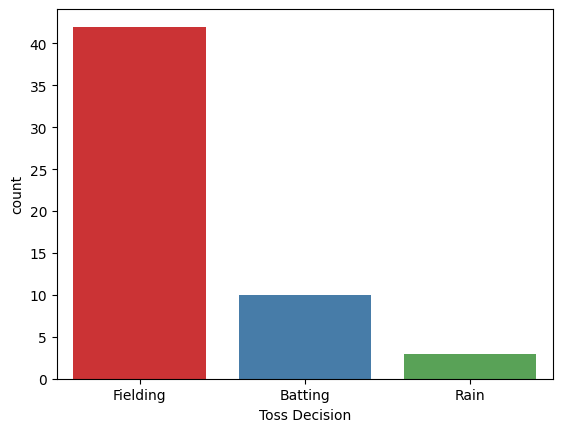

In [103]:
sns.countplot(x=df['Toss Decision'],palette='Set1')

## 3. Won by Wickets/Runs

Text(0.5, 1.0, 'Won by Wickets or Runs')

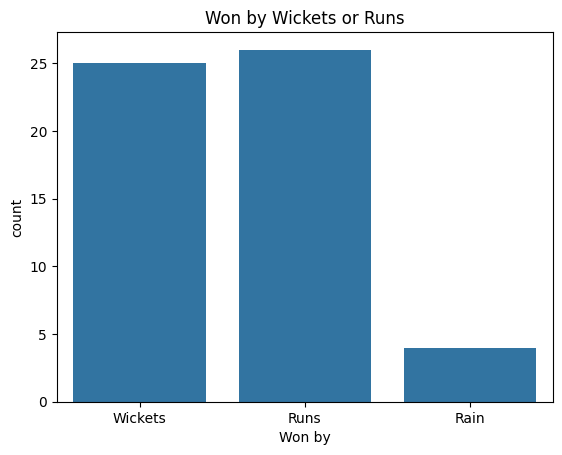

In [104]:
sns.countplot(x=df['Won by'])
plt.title('Won by Wickets or Runs')

## Key Performance Player

### 1. Most Player of the Matchh

In [105]:
df = df[df['Player Of The Match'].str.lower() != 'rain']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6504\3771436323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.values,y=count.index,palette='mako')


Text(0.5, 1.0, 'Most player of the match')

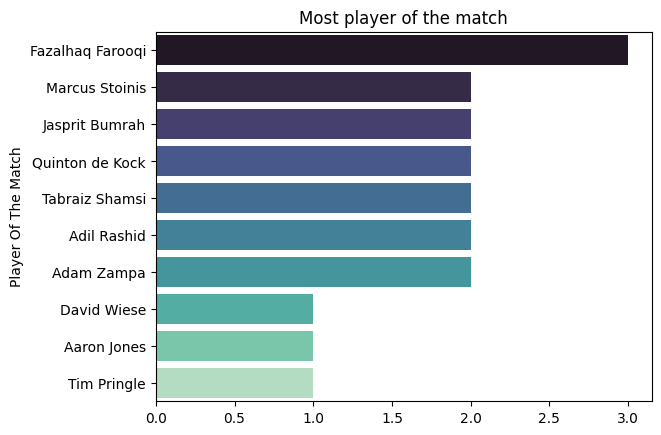

In [106]:
count = df['Player Of The Match'].value_counts().head(10)
sns.barplot(x=count.values,y=count.index,palette='mako')
plt.title('Most player of the match')

### 2. Top 5 High Scorrer

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6504\1956525526.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='mako')


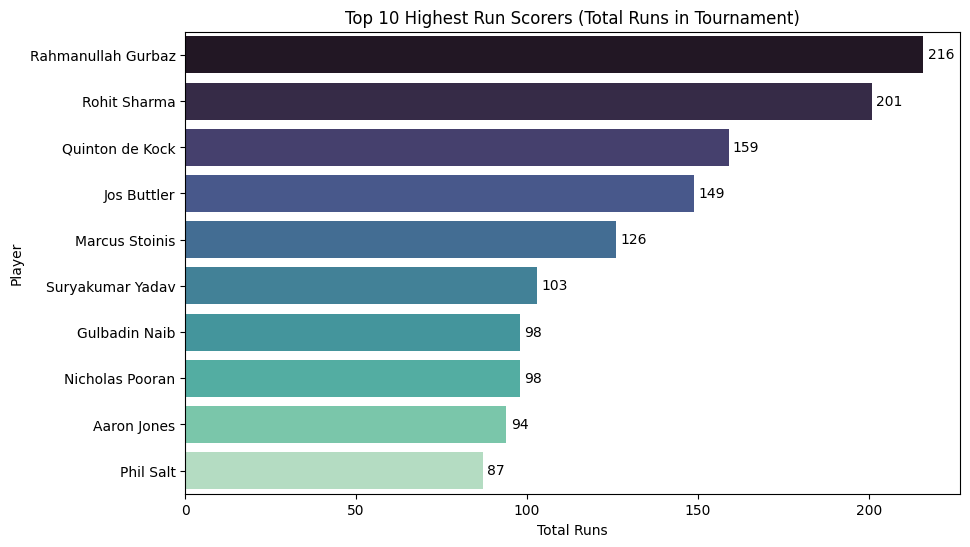

In [107]:
# Group by player name and sum their runs
df['Highest Score'] = pd.to_numeric(df['Highest Score'], errors='coerce').fillna(0)
top_batsmen = df.groupby('Top Scorer')['Highest Score'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='mako')

# Add the exact numbers to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title('Top 10 Highest Run Scorers (Total Runs in Tournament)')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()

### 3. Top 10 best bowling Figure

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6504\3681790218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_bowler.values, y=top_bowler.index, palette='mako')


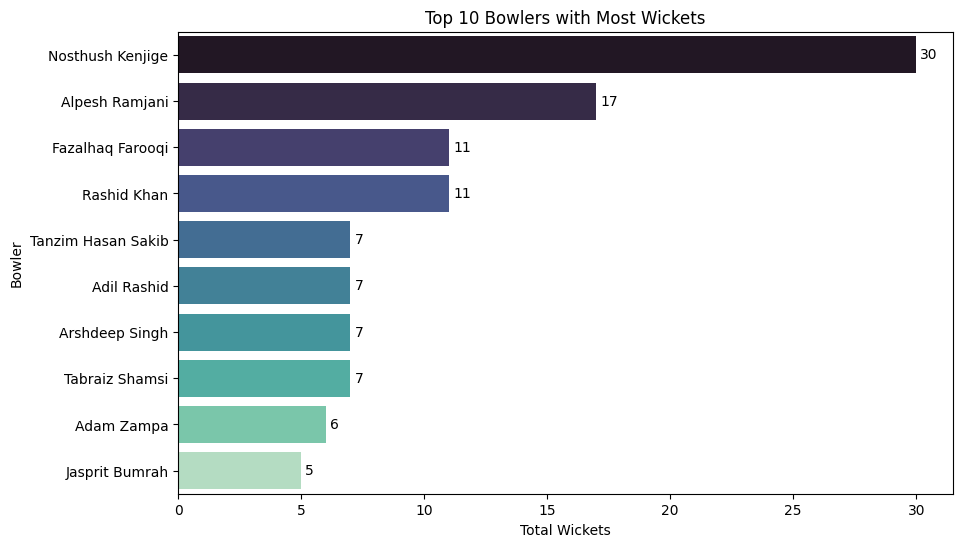

In [108]:
df['Best Bowler Figure(Wickets Taken)'] = pd.to_numeric(df['Best Bowler Figure(Wickets Taken)'], errors='coerce').fillna(0)
top_bowler = df.groupby('Best Bowler')['Best Bowler Figure(Wickets Taken)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_bowler.values, y=top_bowler.index, palette='mako')

# Add labels on bars for total wickets
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title('Top 10 Bowlers with Most Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()


### Most Match played in a Venue

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6504\3194675177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_counts.values,y=venue_counts.index,palette="rainbow")


<Axes: ylabel='Venue'>

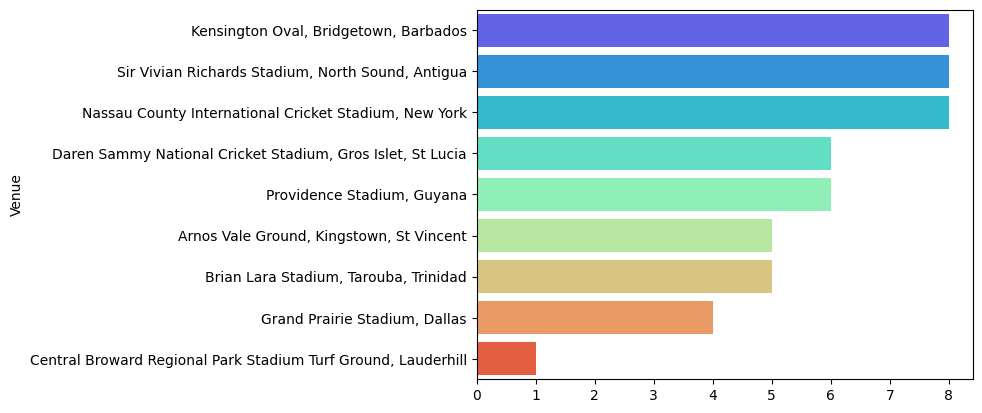

In [109]:
venue_counts = df['Venue'].value_counts()
venue_counts
sns.barplot(x=venue_counts.values,y=venue_counts.index,palette="rainbow")
